## Get the Data

In the following cells we load the [MAANG DATABASE](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies).

   **Step 1 :** Define a function to get historical data from yahoo finance

In [62]:
import pandas as pd

def get_historical_data():  
    col_names = ['Date','Open','High','Low','Close','Volume']
    stocks = pd.read_csv('./AAPL.csv', header=0, names=col_names) 
    
    df = pd.DataFrame(stocks)
    return df

 **Step 2:** get the data of desired firm from [Google Finance](http://www.google.com/finance).

In [63]:
data = get_historical_data() # from January 1, 2008 to June 30, 2021

**Step 3:** Write the data to a csv file.

In [64]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [65]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


       Date      Open      High       Low     Close      Volume
0  7.116786  7.152143  6.876786  6.958571  5.966036  1079178800
1  6.978929  7.049643  6.881786  6.961786  5.968792   842066400
2  6.837500  6.892857  6.388929  6.430357  5.513162  1455832000
3  6.473214  6.557143  6.079643  6.344286  5.439370  2072193200
4  6.433571  6.516429  6.100000  6.116071  5.243707  1523816000


Open   --- mean : 33.30456919576096   	 Std:  31.056440774391497   	 Max:  145.089996   	 Min:  2.928571
High   --- mean : 32.605582136002354   	 Std:  30.30614391471729   	 Max:  141.369995   	 Min:  2.792857
Low    --- mean : 32.96730296114219   	 Std:  30.694401273258745   	 Max:  143.160004   	 Min:  2.792857
Close  --- mean : 31.32577316661761   	 Std:  30.902349544604363   	 Max:  142.28286699999995   	 Min:  2.394498
Volume --- mean : 363480925.169267   	 Std:  340256387.74615556   	 Max:  3372969600   	 Min:  45448000


**Step 2 :** Remove Unncessary data, i.e., Date and High value

In [66]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item        Open       Close    Volume
0     0  136.490005  135.927658  64556100
1     1  135.250000  134.382233  62111300
2     2  133.889999  132.717178  70783700
3     3  134.639999  133.016281  68711000
4     4  134.320007  133.305435  60214200
---
      Item      Open     Close      Volume
3392  3392  6.516429  5.243707  1523816000
3393  3393  6.557143  5.439370  2072193200
3394  3394  6.892857  5.513162  1455832000
3395  3395  7.049643  5.968792   842066400
3396  3396  7.152143  5.966036  1079178800


**Step 2: ** Visualise raw data.

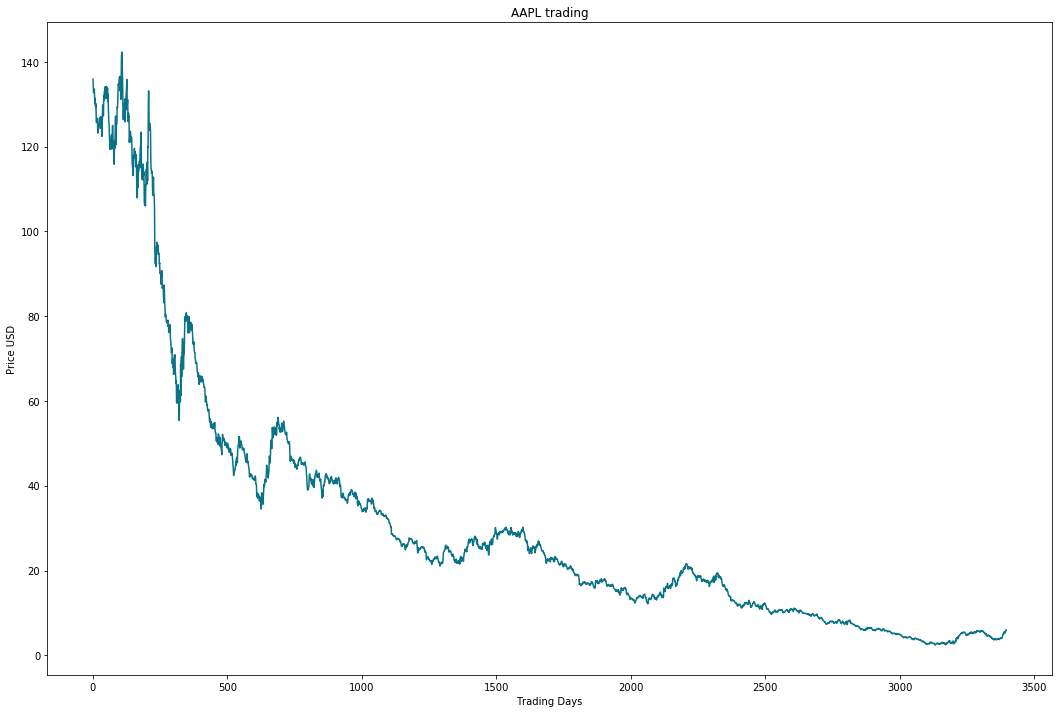

In [67]:
import visualize

visualize.plot_basic(stocks,title='AAPL trading')

**Step 3 :** Normalise the data using minmaxscaler function

In [68]:
stocks = ppd.get_normalised_data(stocks)
print(stocks.head())

print("\n")
print("Open   --- mean :", np.mean(stocks['Open']),  "  \t Std: ", np.std(stocks['Open']),  "  \t Max: ", np.max(stocks['Open']),  "  \t Min: ", np.min(stocks['Open']))
print("Close  --- mean :", np.mean(stocks['Close']), "  \t Std: ", np.std(stocks['Close']), "  \t Max: ", np.max(stocks['Close']), "  \t Min: ", np.min(stocks['Close']))
print("Volume --- mean :", np.mean(stocks['Volume']),"  \t Std: ", np.std(stocks['Volume']),"  \t Max: ", np.max(stocks['Volume']),"  \t Min: ", np.min(stocks['Volume']))

   Item      Open     Close    Volume
0     0  0.939505  0.954569  0.005742
1     1  0.930783  0.943522  0.005008
2     2  0.921216  0.931619  0.007614
3     3  0.926492  0.933757  0.006991
4     4  0.924241  0.935824  0.004438


Open   --- mean : 0.21367257816781848   	 Std:  0.21845898614474002   	 Max:  1.0   	 Min:  0.0
Close  --- mean : 0.20681687386474287   	 Std:  0.2209072116968092   	 Max:  0.9999999999999999   	 Min:  0.0
Volume --- mean : 0.095576517119909   	 Std:  0.10225520031069238   	 Max:  1.0   	 Min:  0.0


**Step 4 :** Visualize the data again

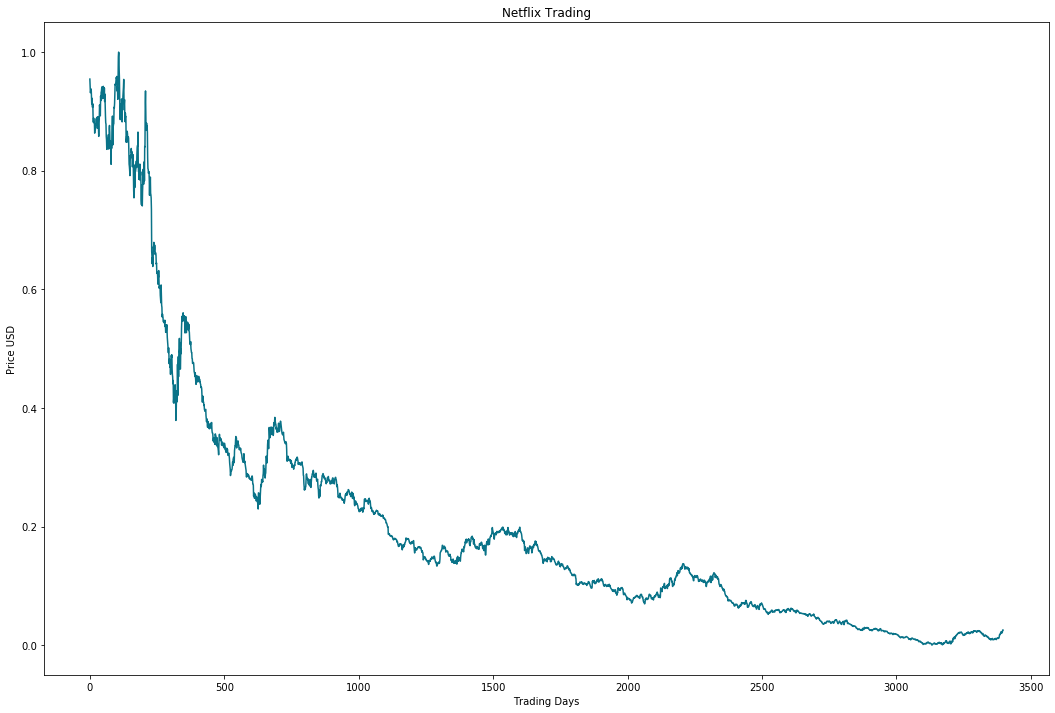

In [69]:
visualize.plot_basic(stocks,title='Netflix Trading')

**Step 5:** Log the normalised data for future resuablilty

In [70]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [71]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume
0,0,0.939505,0.954569,0.005742
1,1,0.930783,0.943522,0.005008
2,2,0.921216,0.931619,0.007614
3,3,0.926492,0.933757,0.006991
4,4,0.924241,0.935824,0.004438


**Step 2:** Split data into train and test pair

In [72]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)


x_train (2327, 1)
y_train (2327, 1)
x_test (1070, 1)
y_test (1070, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [73]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [74]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

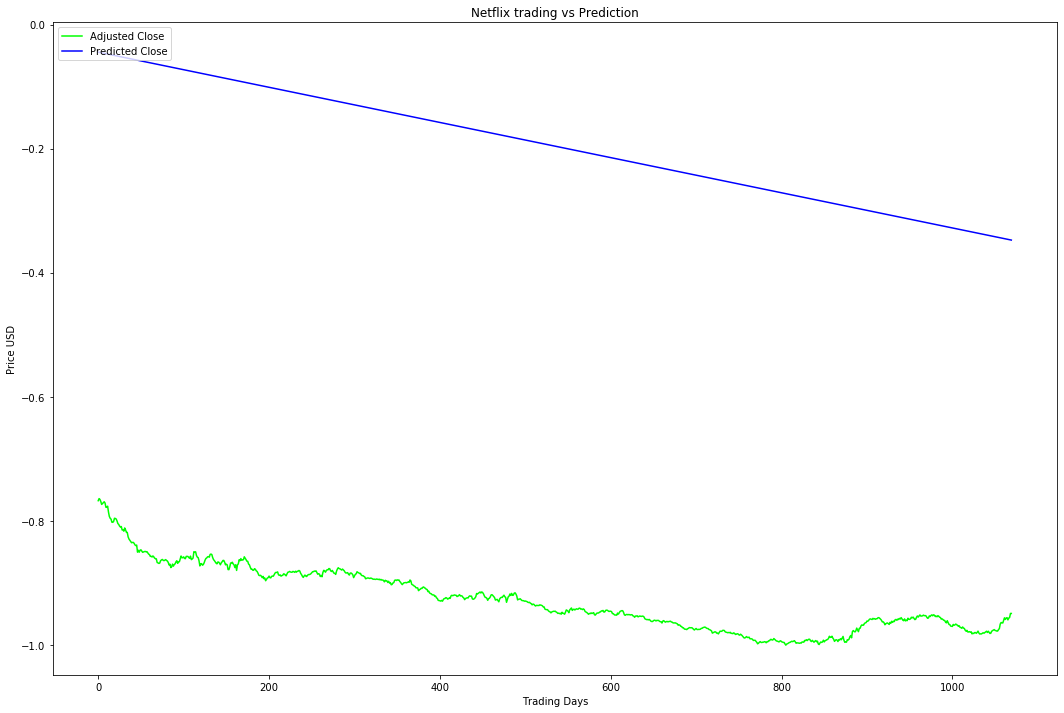

In [75]:
vs.plot_prediction(y_test,predictions,title="Netflix trading vs Prediction")

**Step 6:** measure accuracy of the prediction

In [76]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.6764 MSE (0.8224 RMSE)
Test Score: 0.53748647 MSE (0.73313468 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [77]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume
0,0.939505,0.954569,0.005742
1,0.930783,0.943522,0.005008
2,0.921216,0.931619,0.007614
3,0.926492,0.933757,0.006991
4,0.924241,0.935824,0.004438


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [78]:
X_train, X_test,y_train, y_test = sd.train_test_split_lstm(stocks_data, 5)

unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2841, 50, 3)
y_train (2841,)
x_test (446, 50, 3)
y_test (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [79]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0021703243255615234


**Step 4:** Train the model

In [80]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

85/85 [==============================] - 7s 50ms/step - loss: 0.0054 - val_loss: 4.4481e-05


**Step 5:** make prediction using test data

In [81]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

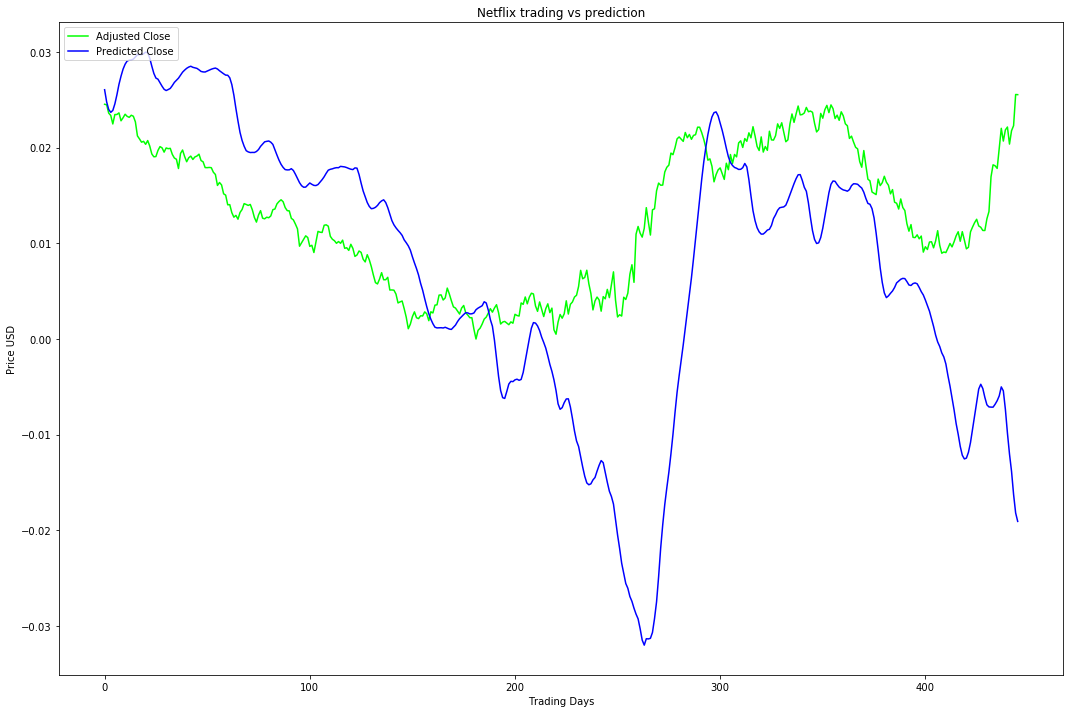

In [82]:
vs.plot_lstm_prediction(y_test,predictions,title = 'Netflix trading vs prediction')

** Step 7:** Get the test score.

In [83]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00040050 MSE (0.02001251 RMSE)
Test Score: 0.00020126 MSE (0.01418648 RMSE)


### Improved LSTM Model

**Step 1: ** Build an improved LSTM model

In [84]:
# Set up hyperparameters
batch_size = 100
epochs = 20

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

start = time.time()
#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.0045168399810791016


**Step 2: ** Train improved LSTM model

In [85]:
model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.05
         )

Epoch 1/20
27/27 - 9s - loss: 0.0145 - val_loss: 0.0013 - 9s/epoch - 345ms/step
Epoch 2/20
27/27 - 5s - loss: 0.0014 - val_loss: 4.8819e-04 - 5s/epoch - 184ms/step
Epoch 3/20
27/27 - 5s - loss: 9.3593e-04 - val_loss: 1.5809e-04 - 5s/epoch - 185ms/step
Epoch 4/20
27/27 - 5s - loss: 8.0788e-04 - val_loss: 1.8951e-04 - 5s/epoch - 179ms/step
Epoch 5/20
27/27 - 5s - loss: 9.0177e-04 - val_loss: 6.3971e-05 - 5s/epoch - 177ms/step
Epoch 6/20
27/27 - 5s - loss: 8.6212e-04 - val_loss: 5.4334e-05 - 5s/epoch - 177ms/step
Epoch 7/20
27/27 - 5s - loss: 8.4004e-04 - val_loss: 1.9330e-05 - 5s/epoch - 190ms/step
Epoch 8/20
27/27 - 5s - loss: 7.6601e-04 - val_loss: 1.3631e-05 - 5s/epoch - 197ms/step
Epoch 9/20
27/27 - 5s - loss: 7.5682e-04 - val_loss: 4.5969e-05 - 5s/epoch - 192ms/step
Epoch 10/20
27/27 - 5s - loss: 7.4293e-04 - val_loss: 9.2986e-06 - 5s/epoch - 187ms/step
Epoch 11/20
27/27 - 5s - loss: 6.9485e-04 - val_loss: 2.3559e-05 - 5s/epoch - 187ms/step
Epoch 12/20
27/27 - 5s - loss: 7.5136e-04 

**Step 3:** Make prediction on improved LSTM model

In [86]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

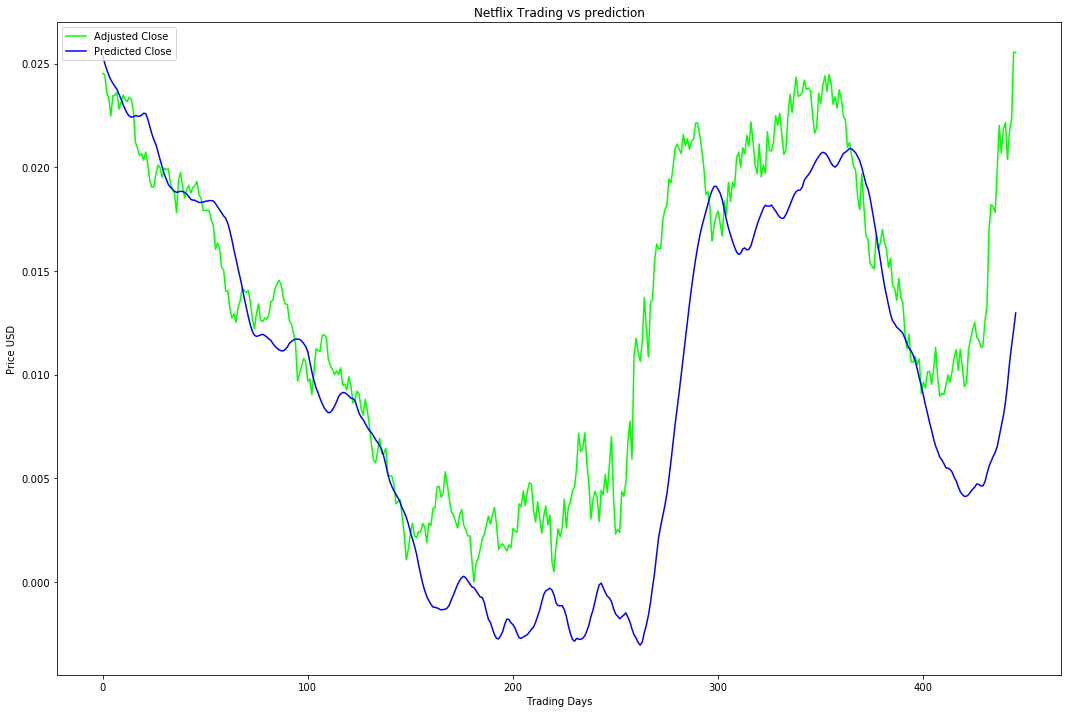

In [87]:
vs.plot_lstm_prediction(y_test,predictions,title='Netflix Trading vs prediction')

**Step 5:** Get the test score

In [88]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.00049774 MSE (0.02231004 RMSE)
Test Score: 0.00002783 MSE (0.00527584 RMSE)


In [89]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

Delta Price: 0.000028 - RMSE * Adjusted Close Range
